# Naive Baye's Classifiers

This is a collection or family of classification algorithms that are based in Baye's Theorem. One common thing about this family is that every pair of feature being classified is independent of each other. Take for instance fruits may be classified based on color, roundness and diameter. Each of these features independently contribute to the probability of predicting an apple or orange.

This algorithm is wel simplified, straightfoward and fast, and is well suited for large datasets. It is widely used for spam filtering, text classification, sentiment analysis and recommenndation systems.

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## Dataset

In [2]:
df = pd.read_csv('../xdata/credit_data.csv')
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [3]:
df.shape

(2000, 6)

## Feature Extraction

In [4]:
df.features = df[["income","age","loan"]]
df.target = df.default
feature_train, feature_test, target_train, target_test = train_test_split(df.features, df.target)

/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_5118/2032332322.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.features = df[["income","age","loan"]]
/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_5118/2032332322.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df.default


## Model Training

In [5]:
model = GaussianNB()
model = model.fit(feature_train, target_train)

## Predictions

In [6]:
predictions = model.predict(feature_test)
# predictions

## Evaluation

We will use error matrix and accuracy score to evaluate the performance of the model

<AxesSubplot:>

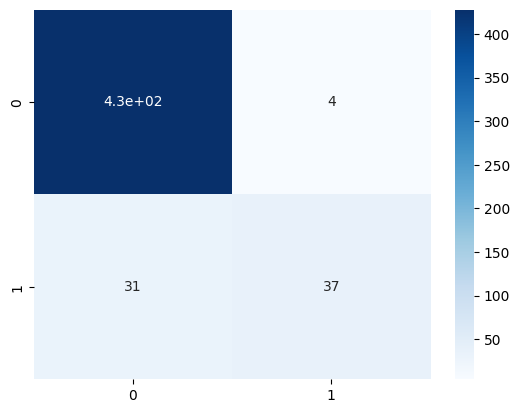

In [7]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')